In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./911.csv')
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
# 어느 도시에서 몇 건의 사건이 발생했는지 상위 10개 도시의 발생 건수 bar chart로

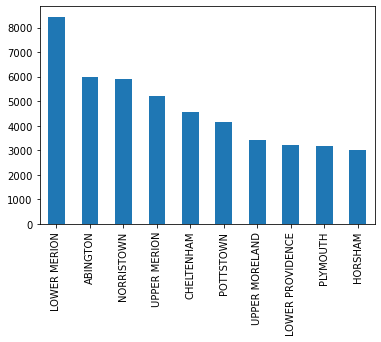

In [11]:
df['twp'].value_counts()[:10].plot(kind='bar')

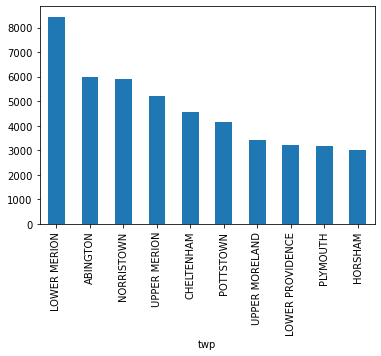

In [15]:
df.groupby('twp')['title'].count().sort_values(ascending=False)[:10].plot(kind='bar')

In [16]:
# title columns에서 각각의 사요유형의 갯수를 bar chart로 표시하시오
# 1. 사고유형 추출
# 2. 사고유형별 건수
# 3. 차트

In [26]:
df['title'].value_counts()

Traffic: VEHICLE ACCIDENT -        23066
Traffic: DISABLED VEHICLE -         7702
Fire: FIRE ALARM                    5496
EMS: RESPIRATORY EMERGENCY          5112
EMS: CARDIAC EMERGENCY              5012
                                   ...  
Fire: PLANE CRASH                      1
EMS: DISABLED VEHICLE                  1
EMS: BOMB DEVICE FOUND                 1
Fire: UNKNOWN MEDICAL EMERGENCY        1
Fire: DIABETIC EMERGENCY               1
Name: title, Length: 110, dtype: int64

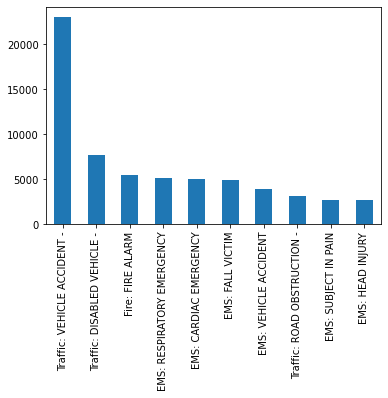

In [25]:
df['title'].value_counts()[:10].plot(kind='bar')

In [30]:
df['title'][0].split(':')[0]
df['title'].apply(lambda x: x.split(':')[0])

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: title, Length: 99492, dtype: object

In [31]:
df['title'].apply(lambda x: x.split(':')[0]).value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: title, dtype: int64

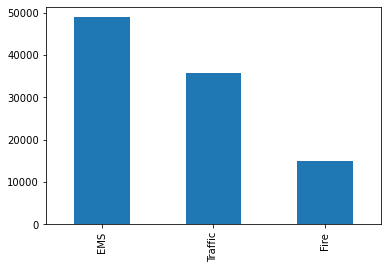

In [32]:
df['title'].apply(lambda x: x.split(':')[0]).value_counts().plot(kind='bar')

In [33]:
# 월별 사건 발생 추이를 line chart로 나타내시오.
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [47]:
df['timeStamp'][0][:7]

'2015-12'

In [48]:
df['timeStamp'].apply(lambda x: x[:7])

0        2015-12
1        2015-12
2        2015-12
3        2015-12
4        2015-12
          ...   
99487    2016-08
99488    2016-08
99489    2016-08
99490    2016-08
99491    2016-08
Name: timeStamp, Length: 99492, dtype: object

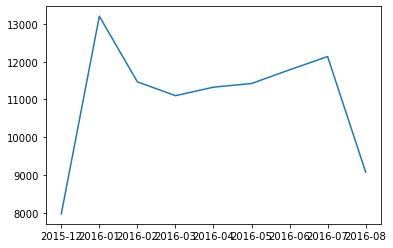

In [52]:
df['timeStamp'].apply(lambda x: x[:7]).value_counts().sort_index().plot(kind='line')

In [53]:
# 각 월에 어느 사건이 몇 건 발생했는지 월별 사건 유형별 발생 빈도를 출력하시오
# 그리고 table로 만들어서 heatmap으로 시각화하시오

In [60]:
df['month'] = df['timeStamp'].apply(lambda x: x[:7])
df['title category'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,month,title category
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015-12,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12,EMS


In [70]:
df.groupby(['month', 'title category'])['zip'].count()

month    title category
2015-12  EMS               3538
         Fire               960
         Traffic           2409
2016-01  EMS               5545
         Fire              1669
         Traffic           4313
2016-02  EMS               4890
         Fire              1632
         Traffic           3408
2016-03  EMS               5295
         Fire              1418
         Traffic           3042
2016-04  EMS               5146
         Fire              1494
         Traffic           3255
2016-05  EMS               5217
         Fire              1358
         Traffic           3371
2016-06  EMS               5145
         Fire              1556
         Traffic           3511
2016-07  EMS               5494
         Fire              1651
         Traffic           3488
2016-08  EMS               4057
         Fire              1274
         Traffic           2501
Name: zip, dtype: int64

In [71]:
df.groupby(['month', 'title category'])['zip'].count().unstack()

title category,EMS,Fire,Traffic
month,,,
2015-12,3538,960,2409
2016-01,5545,1669,4313
2016-02,4890,1632,3408
2016-03,5295,1418,3042
2016-04,5146,1494,3255
2016-05,5217,1358,3371
2016-06,5145,1556,3511
2016-07,5494,1651,3488
2016-08,4057,1274,2501


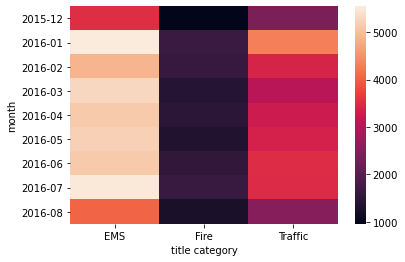

In [72]:
sns.heatmap(df.groupby(['month', 'title category'])['zip'].count().unstack())